In [1]:
import pandas as pd
import datetime
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline 

In [3]:
targetdir = "./data/EdgeWeight/total_window_cdf/"
filename = "weightCDF_total_window.csv"

df = pd.read_csv(targetdir + filename)

In [4]:
df

,weight,cumulative_probability,total_transactions,percentage_of_total_transaction
0,14022,3.724800e-07,4944528,0.28
1,10587,7.449600e-07,4944528,0.21
2,6481,1.117430e-06,4944528,0.13
3,6082,1.489910e-06,4944528,0.12
4,6061,1.862390e-06,4944528,0.12
...,...,...,...,...
2684718,1,1.000000e+00,4944528,0.00
2684719,1,1.000000e+00,4944528,0.00
2684720,1,1.000000e+00,4944528,0.00
2684721,1,1.000000e+00,4944528,0.00


In [5]:
total_transactions = df["total_transactions"][0]
total_transactions

4944528

In [6]:
df.drop(["total_transactions", "percentage_of_total_transaction"], axis=1, inplace=True)

In [7]:
df

,weight,cumulative_probability
0,14022,3.724800e-07
1,10587,7.449600e-07
2,6481,1.117430e-06
3,6082,1.489910e-06
4,6061,1.862390e-06
...,...,...
2684718,1,1.000000e+00
2684719,1,1.000000e+00
2684720,1,1.000000e+00
2684721,1,1.000000e+00


In [8]:
df[(df["weight"] >900) & (df["weight"] < 1100)]

,weight,cumulative_probability
74,1061,0.000028
75,1058,0.000028
76,1049,0.000029
77,1043,0.000029
78,1030,0.000029
79,1014,0.000030
80,990,0.000030
81,966,0.000031
82,964,0.000031
83,959,0.000031


In [9]:
1-0.173108

0.826892

In [10]:
df[(df["cumulative_probability"] > 0.049742) & 
            (df["cumulative_probability"] < 0.0599999)]

,weight,cumulative_probability
107911,4,0.055342
107912,4,0.055342
107913,4,0.055342
107914,4,0.055342
107915,4,0.055342
...,...,...
148573,4,0.055342
148574,4,0.055342
148575,4,0.055342
148576,4,0.055342


In [27]:
df[(df["cumulative_probability"] > 0.75) & 
            (df["cumulative_probability"] < 1)]

,weight,cumulative_probability


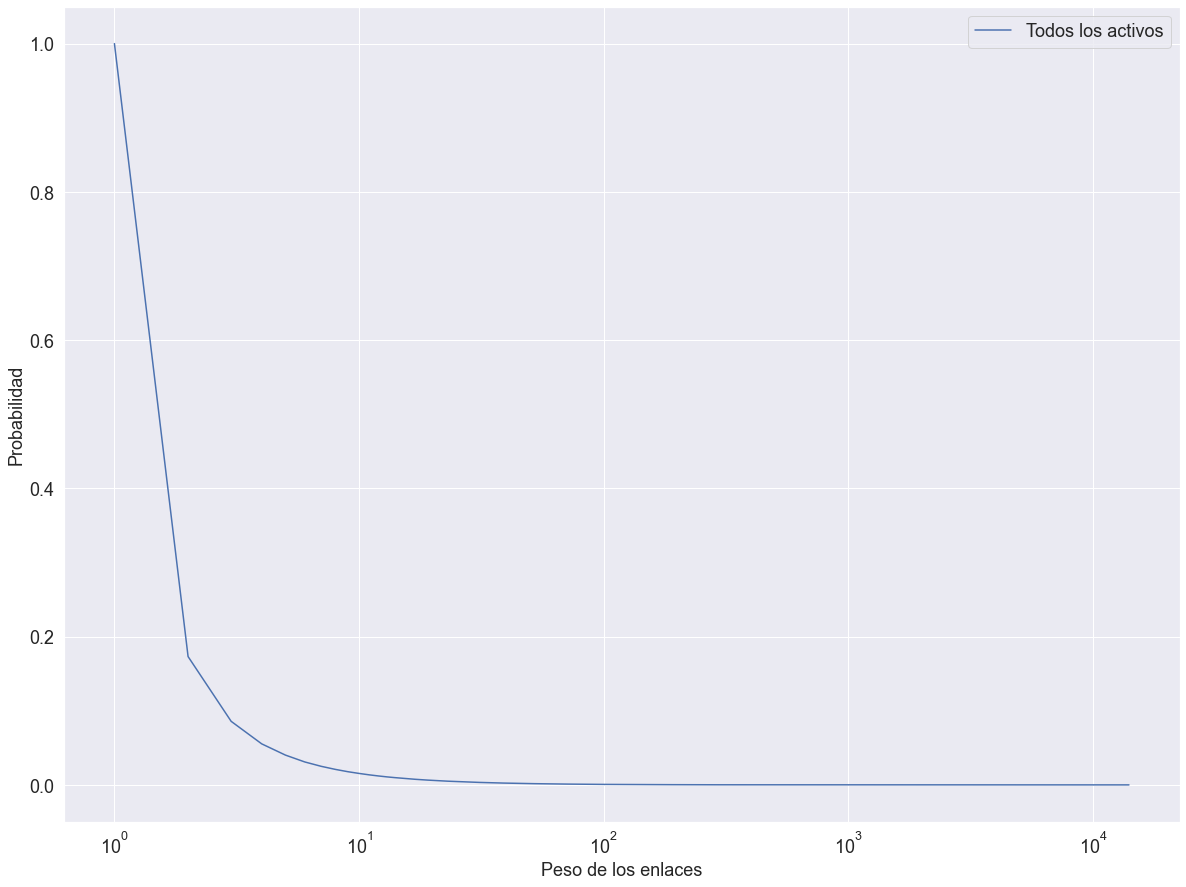

In [12]:
ax = df.plot(kind = 'line', x = 'weight', y = 'cumulative_probability')

ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel("Peso de los enlaces", fontsize=18)
ax.set_ylabel("Probabilidad", fontsize=18)
plt.legend(["Todos los activos"], prop={'size': 18})
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)
plt.rcParams["figure.figsize"] = (20,15)

plt.savefig("./weightCDF/total_window/Figura_29.svg", bbox_inches='tight')

In [35]:
grouped_df = df.groupby("cumulative_probability").mean()
grouped_df = grouped_df.reset_index()
#grouped_df.loc[(grouped_df["cumulative_probability"] == 0.0), "cumulative_probability"] = 0.000001 
grouped_df

,cumulative_probability,weight
0,3.724800e-07,14022.0
1,7.449600e-07,10587.0
2,1.117430e-06,6481.0
3,1.489910e-06,6082.0
4,1.862390e-06,6061.0
...,...,...
591,4.019446e-02,5.0
592,5.534202e-02,4.0
593,8.573436e-02,3.0
594,1.731076e-01,2.0


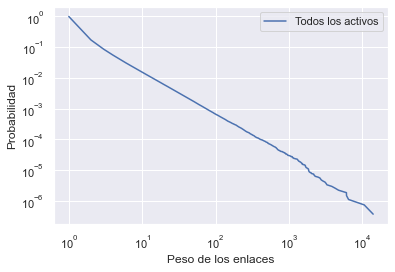

In [36]:
ax = grouped_df.plot(kind = 'line', x = 'weight', y = 'cumulative_probability')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Peso de los enlaces")
ax.set_ylabel("Probabilidad")
plt.legend(["Todos los activos"])

#plt.savefig("./weightCDF/total_window/weightCDF_all_assets.svg", bbox_inches='tight')

In [37]:
df.sort_values(["weight"], ascending=False)

,weight,cumulative_probability
0,14022,3.724800e-07
1,10587,7.449600e-07
2,6481,1.117430e-06
3,6082,1.489910e-06
4,6061,1.862390e-06
...,...,...
1204731,1,1.000000e+00
1204730,1,1.000000e+00
1204729,1,1.000000e+00
1204728,1,1.000000e+00


In [38]:
sum(df.sort_values(["weight"], ascending=False)[:338602]["weight"])

2472263

In [39]:
sum(df.sort_values(["weight"], ascending=False)[338602:]["weight"])

2472265

In [40]:
338602/2684723

0.12612176377227743

In [41]:
sum(df[df["cumulative_probability"] <= 0.12612176377227743]["weight"])

2255405

In [42]:
df[(df["cumulative_probability"] <= 0.3)].sort_values(["cumulative_probability"])

,weight,cumulative_probability
0,14022,3.724800e-07
1,10587,7.449600e-07
2,6481,1.117430e-06
3,6082,1.489910e-06
4,6061,1.862390e-06
...,...,...
308367,2,1.731076e-01
308368,2,1.731076e-01
308369,2,1.731076e-01
308371,2,1.731076e-01


In [43]:
df["cumulative_probability"].unique()

array([3.72480000e-07, 7.44960000e-07, 1.11743000e-06, 1.48991000e-06,
       1.86239000e-06, 2.23487000e-06, 2.60735000e-06, 2.97982000e-06,
       3.35230000e-06, 3.72478000e-06, 4.09726000e-06, 4.46973000e-06,
       4.84221000e-06, 5.21469000e-06, 5.58717000e-06, 5.95965000e-06,
       6.33212000e-06, 6.70460000e-06, 7.07708000e-06, 7.44956000e-06,
       7.82204000e-06, 8.19451000e-06, 8.56699000e-06, 8.93947000e-06,
       9.31195000e-06, 9.68443000e-06, 1.00569000e-05, 1.04293800e-05,
       1.08018600e-05, 1.11743400e-05, 1.15468200e-05, 1.19192900e-05,
       1.22917700e-05, 1.26642500e-05, 1.30367300e-05, 1.34092000e-05,
       1.41541600e-05, 1.45266400e-05, 1.48991200e-05, 1.52715900e-05,
       1.56440700e-05, 1.60165500e-05, 1.63890300e-05, 1.67615100e-05,
       1.71339800e-05, 1.75064600e-05, 1.78789400e-05, 1.82514200e-05,
       1.86239000e-05, 1.89963700e-05, 1.93688500e-05, 1.97413300e-05,
       2.04862800e-05, 2.08587600e-05, 2.12312400e-05, 2.16037200e-05,
      